In [18]:
from distutils.command.build import build

from multicell_utils.builder import ModelBuilder, ProcessCreator, ObjectCreator

In [19]:
demo_model = ModelBuilder(model_name='demo')
demo_model.add_object(name='universe', object_type='Universe', contained_objects=['cell field', 'chemical field'])
demo_model.add_object(name='chemical field', object_type='Field')
demo_model.add_object(name='cell field', object_type='CellField', contained_objects=['cell'])
demo_model.add_object(name='cell', object_type='Cell')
demo_model.add_process(name='growth', process_type='Growth', participating_objects='cell')
demo_model.add_process(name='diffusion', process_type='Diffusion', participating_objects='chemical field')
demo_model.add_process(name='volume exclusion', process_type='VolumeExclusion', participating_objects='cell field')
# demo_model

In [20]:
# demo_model.verify()
demo_model.save(filename='demo_model.json')

Schema Universe is valid.
Schema Field is valid.
Schema CellField is valid.
Schema Cell is valid.
Schema Growth: is invalid: 
 'update' is a required property
Schema Diffusion: is invalid: 
 'update' is a required property
Schema VolumeExclusion: is invalid: 
 'update' is a required property
Model saved to models/demo_model.json


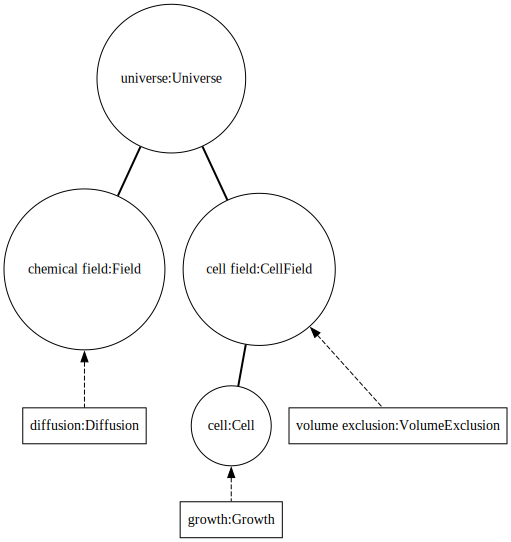

In [21]:
demo_model.graph()